# VGG16

## Image Feature Extraction

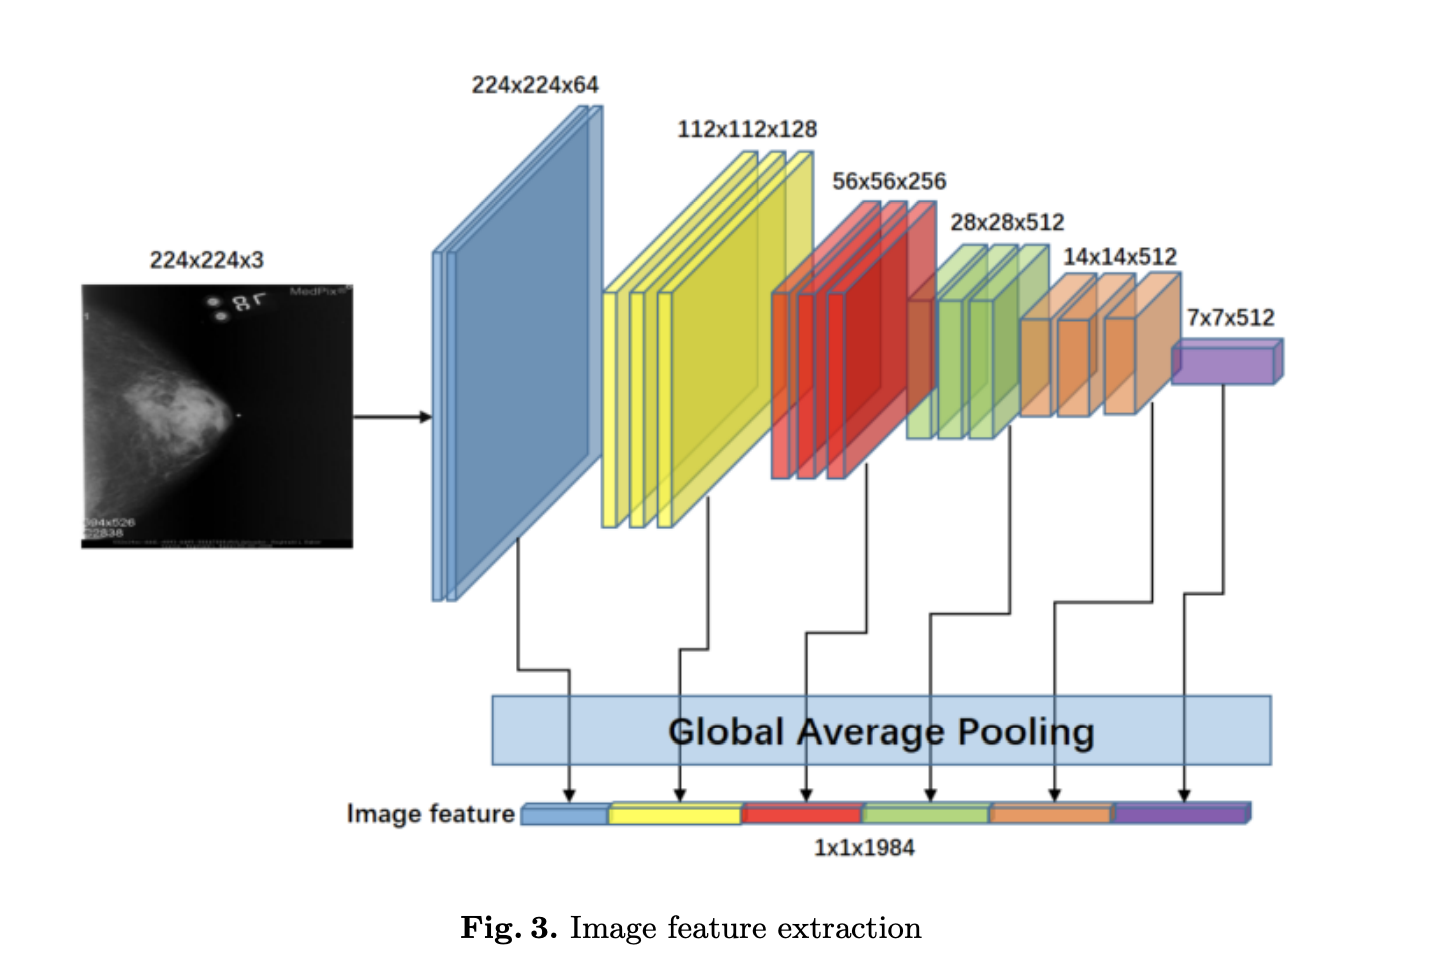

Based on the state-of-the-art paper by [Zhejiang University at ImageCLEF 2019](http://ceur-ws.org/Vol-2380/paper_85.pdf), we follow the following steps for implementing the **Image Feature Extraction** module:-
  
1. Use the VGG16 model pretrained on the ImageNet dataset.
2. Extract features of all 6 blocks from VGG16.
3. Perform Global Average Pooling (GAP) on the extracted feature tensors individually.
4. Concatenate all the resulting tensors after performing GAP.
5. Resultant tensor should be of 1x1x1984 dimensions.

## Dependencies

1. **tensorflow.keras.applications.vgg16**: Initiates the VGG16 model. It is loaded with pre-trained weights on ImageNet. The default input size for this model is 224x224. We also load it's input preprocessing module.
2. **tensorflow.keras.models**: It groups the layers into an object that can be used to define a custom model and train it.
3. **tensorflow.keras.preprocessing**: It's image module consists of real-time image data manipulation methods.
4. **plot_model**: This module is used to plot the architecture of a model.
5. **numpy**: Library to perform mathematical computations on multi-dimensional arrays.
6. **tensorflow**: Tensorflow Core library.
7. **cv2**: OpenCV library.
8. **google.colab.patches**: Displays images on Google Colab.

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.utils.vis_utils import plot_model
import numpy as np
import tensorflow as tf
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


## VGG16 Architecture



![](https://miro.medium.com/max/2268/1*CrjJwSX9S7f759dK2EtGJQ.png)

Printing out the summary for VGG16 base model.

In [ ]:
VGG16().summary()

553467904/553467096 [==============================] - 6s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
____________________________________________________________

Plotting the architecture for the base VGG16 model.

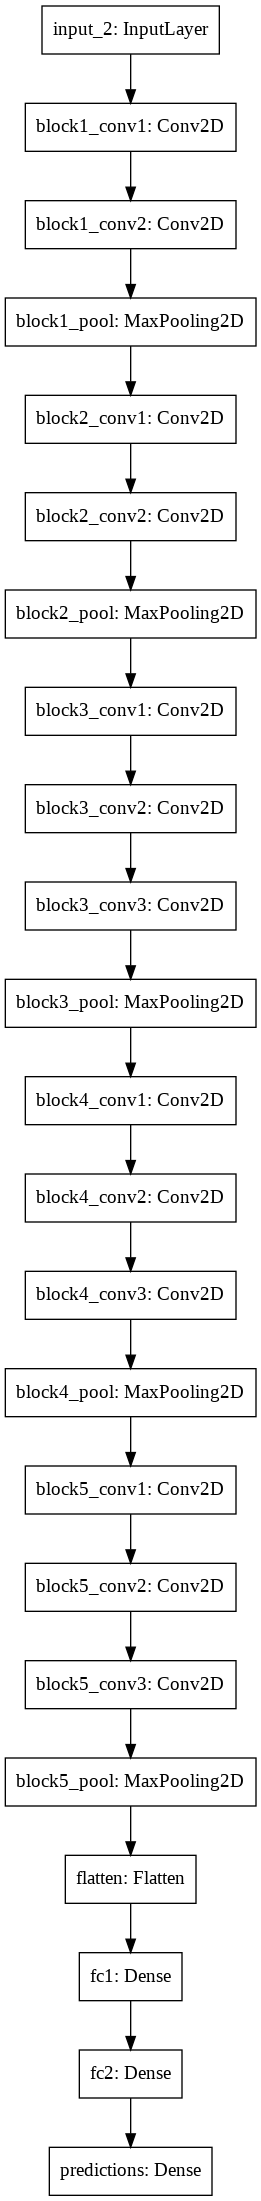

In [ ]:
plot_model(VGG16(), to_file='vgg.png')

## Custom VGG16 Model Analysis

Initializing the VGG16 model with pretrained weights based on ImageNet dataset.

In [ ]:
base_model = VGG16(weights="imagenet")

Creating a custom model to extract the features from a specific **block**.

We set it's input layer same as that of the base VGG16 model.

It's output layer can be set as the output of ANY layers from VGG16 model. Here, we fetch the output from the 2nd Convolutional Layer in the 1st Block.

In [ ]:
model = Model(inputs=base_model.input, outputs=base_model.get_layer('block1_conv2').output)

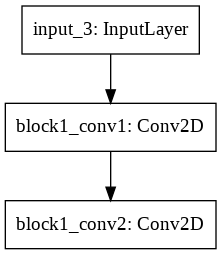

In [ ]:
plot_model(model, to_file='custom_vgg.png')

## Preprocessing

Define the image path and displaying the image using OpenCV.

In [ ]:
img_path='/content/drive/MyDrive/ImageCLEF-2019-Dataset/synpic371.jpg'

In [ ]:
image_cat = cv2.imread(img_path)

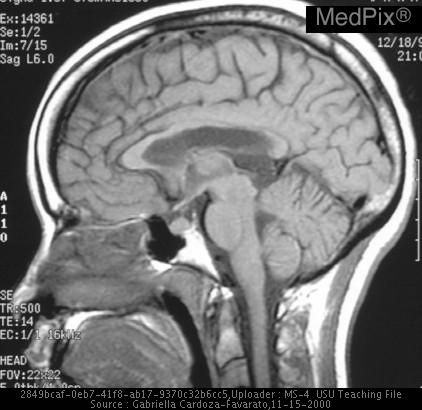

In [ ]:
cv2_imshow(image_cat)

Here we use **load_img()** and **img_to_array()** methods which have been imported from the Keras preprocessing library.
<br><br>
**load_img()**: Loads an image into PIL format.

In [ ]:
img = image.load_img(img_path, target_size=(224,224))

**img_to_array()**: Converts a PIL Image into a Numpy array.

In [ ]:
x = image.img_to_array(img)

**numpy.expand_dims()**: Expands the numpy array.

Here, we convert the 3d-array into a 4d-array.

4d-array format: [samples, rows, cols, channels]

In [ ]:
x = np.expand_dims(x, axis=0)
x.shape

(1, 224, 224, 3)

In [ ]:
x = preprocess_input(x)

## Fetching Block Features

In [ ]:
def get_block_features(block_number):
  temp_model = None
  
  if block_number == 1:
    temp_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block1_conv2').output)
    return temp_model.predict(x)
  
  elif block_number == 2:
    temp_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block2_conv2').output)
    return temp_model.predict(x)

  elif block_number == 3:
    temp_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block3_conv3').output)
    return temp_model.predict(x)
  
  elif block_number == 4:
    temp_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block4_conv3').output)
    return temp_model.predict(x)
  
  elif block_number == 5:
    temp_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_conv3').output)
    return temp_model.predict(x)
  
  elif block_number == 6:
    temp_model = Model(inputs=base_model.input, outputs=base_model.get_layer('block5_pool').output)
    return temp_model.predict(x)
  
  else:
    print("Error: Invalid block number.")


In [ ]:
block1_features = get_block_features(1)
block2_features = get_block_features(2)
block3_features = get_block_features(3)
block4_features = get_block_features(4)
block5_features = get_block_features(5)
block6_features = get_block_features(6)

In [ ]:
print(block1_features.shape)
print(block2_features.shape)
print(block3_features.shape)
print(block4_features.shape)
print(block5_features.shape)
print(block6_features.shape)

(1, 224, 224, 64)
(1, 112, 112, 128)
(1, 56, 56, 256)
(1, 28, 28, 512)
(1, 14, 14, 512)
(1, 7, 7, 512)


In [ ]:
print(block1_features)

[[[[  0.          0.         27.706089  ...   0.          6.5403314
    482.74524  ]
   [  0.          0.         31.144423  ...   0.        466.91058
    631.2856   ]
   [  0.          0.         42.998554  ...   0.        339.7842
    583.55707  ]
   ...
   [  0.          0.         57.14505   ...   0.        348.8479
    213.51988  ]
   [  0.          0.         58.99478   ...   0.          0.
    288.24835  ]
   [497.44742    59.66929    37.07841   ...   0.        346.13547
    126.47046  ]]

  [[  0.          0.         49.91098   ...   0.          0.
    155.307    ]
   [178.32613     0.         88.92933   ...   0.          0.
     73.38077  ]
   [100.83569     0.         99.10594   ...   0.        245.2012
      0.       ]
   ...
   [ 73.33924   196.5909    124.19012   ...  89.00584   187.38608
      0.       ]
   [578.325     321.0322    120.92854   ... 148.48512     0.
    138.57236  ]
   [619.57635   548.2911     84.42181   ... 162.74664    44.64861
      0.       ]]

  [[134

## Result

In [ ]:
block1_gap = tf.keras.layers.GlobalAveragePooling2D()(block1_features)
block2_gap = tf.keras.layers.GlobalAveragePooling2D()(block2_features)
block3_gap = tf.keras.layers.GlobalAveragePooling2D()(block3_features)
block4_gap = tf.keras.layers.GlobalAveragePooling2D()(block4_features)
block5_gap = tf.keras.layers.GlobalAveragePooling2D()(block5_features)
block6_gap = tf.keras.layers.GlobalAveragePooling2D()(block6_features)

In [ ]:
block1_gap

<tf.Tensor: shape=(1, 64), dtype=float32, numpy=
array([[141.51372 , 123.1967  , 121.80125 ,  69.9246  , 358.33148 ,
        131.6799  ,  93.17432 ,  65.99344 , 110.077515, 106.695274,
        145.61157 ,  57.94974 , 158.05432 , 157.78572 ,  53.957615,
         76.06179 , 112.27162 , 148.68599 ,  89.3039  ,  70.80237 ,
        112.15089 ,  97.05039 ,  81.31816 ,  17.129047, 178.99915 ,
        150.22209 , 153.07559 , 386.05798 , 147.96432 , 135.13893 ,
         84.92035 ,  92.89209 , 124.87538 , 142.73215 , 165.50092 ,
         75.33033 ,  83.329895, 162.997   , 144.27274 ,  89.81327 ,
        167.90228 , 157.49968 , 244.45474 ,  95.10058 , 132.42949 ,
         75.55214 , 123.48736 , 211.59258 ,  79.516716,  12.964728,
        111.28786 , 104.07448 , 302.40027 , 173.5537  ,  20.264923,
        125.88912 , 151.36728 ,  62.750504, 151.30879 ,  85.36299 ,
         61.698067,  44.287254,  97.63516 , 103.313286]], dtype=float32)>

In [ ]:
result = np.concatenate((block1_gap, block2_gap, block3_gap, block4_gap, block5_gap, block6_gap), axis=1)
result = np.array([result])
print(result.shape)
print(result)

(1, 1, 1984)
[[[141.51372   123.1967    121.80125   ...   8.5662775   0.3047954
    12.977199 ]]]


****

In [ ]:
# y = tf.convert_to_tensor([
#                           [ 
#                            [[1, 5, 1, 1], 
#                             [3, 3, 3, 3]]
#                            ]
#                           ])
# y = tf.convert_to_tensor([
#                           [ 
#                            [[1, 1, 1, 1], 
#                             [3, 3, 3, 3]], 
#                            [[3, 3, 3, 3], 
#                             [5, 5, 5, 5]]
#                            ]
#                           ])
# print(y.shape)
# print(tf.keras.layers.GlobalAveragePooling2D()(y))